In [8]:
import pandas as pd
import matplotlib as plt
from scipy import stats
import numpy as np

In [9]:
df = pd.read_csv('rainfall_data/rainfall_india.csv')

df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [10]:
# think that rainfall in JAN is gamma distributed and estimate its parameters

jan_rainfall = df['JAN']
jan_rainfall = jan_rainfall[jan_rainfall > 0]  # remove zero values
# fit a gamma distribution to the data
shape, loc, scale = stats.gamma.fit(jan_rainfall, floc=0)
print(f"Shape: {shape}, Location: {loc}, Scale: {scale}")
# plot the histogram of the data
plt.pyplot.hist(jan_rainfall, bins=30, density=True, alpha=0.6, color='g')
# plot the fitted gamma distribution
x = np.linspace(0, jan_rainfall.max(), 100)
pdf = stats.gamma.pdf(x, shape, loc=loc, scale=scale)
plt.pyplot.plot(x, pdf, 'r-', lw=2)
plt.pyplot.title('Gamma Distribution Fit to January Rainfall')
plt.pyplot.xlabel('Rainfall (mm)')
plt.pyplot.ylabel('Density')
plt.pyplot.show()



Shape: 0.5332815683513092, Location: 0, Scale: 41.71664530860785


AttributeError: module 'matplotlib' has no attribute 'pyplot'

Shape: 2.7932780634164835, Location: 0, Scale: 505.14444595955604


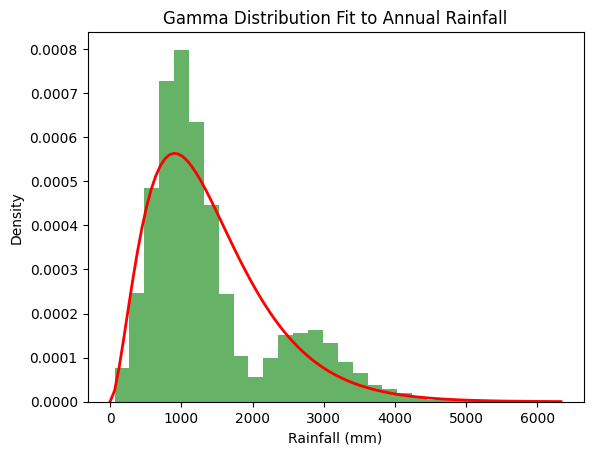

In [ ]:
# assume the Annual rainfall is gamma distributed and estimate its parameters
annual_rainfall = df['ANNUAL']
annual_rainfall = annual_rainfall[annual_rainfall > 0]  # remove zero values
# fit a gamma distribution to the data
shape, loc, scale = stats.gamma.fit(annual_rainfall, floc=0)
print(f"Shape: {shape}, Location: {loc}, Scale: {scale}")
# plot the histogram of the data
plt.pyplot.hist(annual_rainfall, bins=30, density=True, alpha=0.6, color='g')
# plot the fitted gamma distribution
x = np.linspace(0, annual_rainfall.max(), 100)
pdf = stats.gamma.pdf(x, shape, loc=loc, scale=scale)
plt.pyplot.plot(x, pdf, 'r-', lw=2)
plt.pyplot.title('Gamma Distribution Fit to Annual Rainfall')
plt.pyplot.xlabel('Rainfall (mm)')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

Mean: 1411.0088997555013, Std: 903.7360635097127


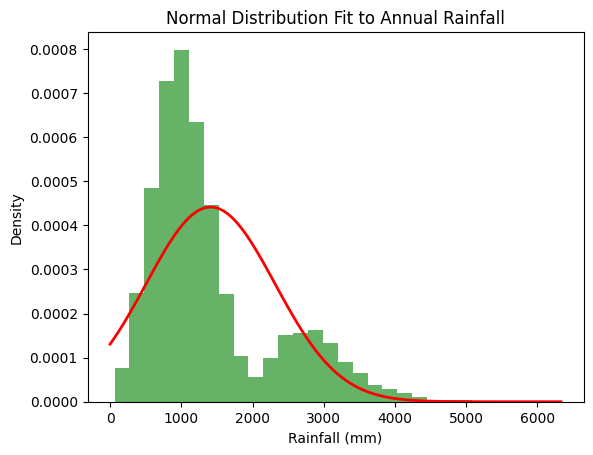

In [ ]:
#think of Annual rainfall as normal distributed and estimate its parameters
annual_rainfall = df['ANNUAL']
annual_rainfall = annual_rainfall[annual_rainfall > 0]  # remove zero values
# fit a normal distribution to the data
mu, std = stats.norm.fit(annual_rainfall)
print(f"Mean: {mu}, Std: {std}")
# plot the histogram of the data
plt.pyplot.hist(annual_rainfall, bins=30, density=True, alpha=0.6, color='g')
# plot the fitted normal distribution
x = np.linspace(0, annual_rainfall.max(), 100)
pdf = stats.norm.pdf(x, mu, std)
plt.pyplot.plot(x, pdf, 'r-', lw=2)
plt.pyplot.title('Normal Distribution Fit to Annual Rainfall')
plt.pyplot.xlabel('Rainfall (mm)')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

In [ ]:
# calculat the 95% confidence interval for the variance of Annual rainfall

alpha = 0.05
# take a sample
sample = np.random.choice(annual_rainfall, size=100, replace=False)
n = len(sample)
# calculate the sample variance
s2 = np.var(sample, ddof=1)
# calculate the chi-squared critical values
chi2_lower = stats.chi2.ppf(alpha / 2, n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, n - 1)
# calculate the confidence interval
ci_lower = (n - 1) * s2 / chi2_upper
ci_upper = (n - 1) * s2 / chi2_lower
print(f"95% Confidence Interval for Variance: ({ci_lower}, {ci_upper})")
print(f"95% Confidence Interval for Standard Deviation: ({np.sqrt(ci_lower)}, {np.sqrt(ci_upper)})")

95% Confidence Interval for Variance: (602812.0634745607, 1055250.601109577)
95% Confidence Interval for Standard Deviation: (776.4097265455661, 1027.2539126766942)


In [13]:
from scipy.stats import t


In [16]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [26]:
population1 = df[df['SUBDIVISION'] == 'LAKSHADWEEP']['ANNUAL'].dropna()
population2 = df[df['SUBDIVISION'] == 'ANDAMAN & NICOBAR ISLANDS']['ANNUAL'].dropna()


## Calculate population means 
mean1 = population1.mean()
mean2 = population2.mean()
actual_population_diff = mean1 - mean2
print(f"Mean rainfall in Lakshadweep: {mean1:.4f}")  
print(f"Mean rainfall in Andaman&Nicobar Islands: {mean2:.4f}")
print(f"Population mean difference in rainfall: {mean1 - mean2:.4f}")

## TAKE A SAMPLE from each population
sample1 = population1.sample(n=100, random_state=1)
sample2 = population2.sample(n=100, random_state=1)

## Calculate sample means
n1, n2 = len(sample1), len(sample2)

sample_mean1 = sample1.mean()
sample_mean2 = sample2.mean()
print(f"Sample mean rainfall in Lakshadweep: {sample_mean1:.4f}")
print(f"Sample mean rainfall in Andaman&Nicobar Islands: {sample_mean2:.4f}")

var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)

# Compute degrees of freedom (Welch-Satterthwaite approximation)
numerator = ((var1/n1 + var2/n2))**2
denominator = ((var1/n1)**2/ (n1 - 1)) + ((var2/n2)**2 / (n2 - 1))
degrees_of_freedom = numerator / denominator




std_error = np.sqrt(var1/n1 + var2/n2)
t_critical = t.ppf(0.975, degrees_of_freedom)  # Two-tailed test at 95% confidence level

mean_diff = sample_mean1 - sample_mean2
ci_lower = mean_diff - t_critical * std_error
ci_upper = mean_diff + t_critical * std_error

print(f"Mean Difference: {mean_diff:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")


Mean rainfall in Lakshadweep: 1590.8864
Mean rainfall in Andaman&Nicobar Islands: 2927.4394
Population mean difference in rainfall: -1336.5530
Sample mean rainfall in Lakshadweep: 1590.2980
Sample mean rainfall in Andaman&Nicobar Islands: 2924.9880
Mean Difference: -1334.6900
95% Confidence Interval: (-1432.0621, -1237.3179)


In [33]:
n_samples = 100
count = 0
for i in range(n_samples):
    sample1 = population1.sample(n=100)
    sample2 = population2.sample(n=100)

    sample_mean1 = sample1.mean()
    sample_mean2 = sample2.mean()

    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)

    # Compute degrees of freedom (Welch-Satterthwaite approximation)
    numerator = ((var1/n1 + var2/n2))**2
    denominator = ((var1/n1)**2/ (n1 - 1)) + ((var2/n2)**2 / (n2 - 1))
    degrees_of_freedom = numerator / denominator

    std_error = np.sqrt(var1/n1 + var2/n2)
    t_critical = t.ppf(0.975, degrees_of_freedom)  # Two-tailed test at 95% confidence level

    mean_diff = sample_mean1 - sample_mean2
    ci_lower = mean_diff - t_critical * std_error
    ci_upper = mean_diff + t_critical * std_error


    if actual_population_diff > ci_lower and actual_population_diff < ci_upper:
        count += 1

    print(f"Sample {i+1}: Mean Difference: {mean_diff:.4f}, 95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")


print(f'Percentage of Samples that contained the population mean difference: {count/n_samples*100:.2f}%')

Sample 1: Mean Difference: -1321.0280, 95% CI: (-1417.9896, -1224.0664)
Sample 2: Mean Difference: -1327.7440, 95% CI: (-1425.5638, -1229.9242)
Sample 3: Mean Difference: -1343.2510, 95% CI: (-1438.3500, -1248.1520)
Sample 4: Mean Difference: -1348.6450, 95% CI: (-1446.3217, -1250.9683)
Sample 5: Mean Difference: -1339.8820, 95% CI: (-1436.7987, -1242.9653)
Sample 6: Mean Difference: -1338.9770, 95% CI: (-1436.8531, -1241.1009)
Sample 7: Mean Difference: -1347.4910, 95% CI: (-1444.5399, -1250.4421)
Sample 8: Mean Difference: -1328.8980, 95% CI: (-1426.8794, -1230.9166)
Sample 9: Mean Difference: -1343.0600, 95% CI: (-1441.0644, -1245.0556)
Sample 10: Mean Difference: -1345.3760, 95% CI: (-1443.4792, -1247.2728)
Sample 11: Mean Difference: -1353.8010, 95% CI: (-1449.8961, -1257.7059)
Sample 12: Mean Difference: -1329.3000, 95% CI: (-1425.1746, -1233.4254)
Sample 13: Mean Difference: -1335.4950, 95% CI: (-1433.9834, -1237.0066)
Sample 14: Mean Difference: -1332.4160, 95% CI: (-1430.5641,